# Portfolio Exploration

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import sys
sys.path.insert(0, '../')
from portfolio import *

#### This notebook relies on the functions in `portfolio.py`, and it assumes this file is kept one level higher in the directory than this notebook.

See the last three lines in the cell above. It calls the path to `portfolio.py` then it loads all the functions from `portfolio.py`.

In [16]:
info = pd.read_excel('../data/commodities_return_data.xlsx',sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

rets = pd.read_excel('../data/commodities_return_data.xlsx',sheet_name='total returns')
rets.set_index('Date',inplace=True)

ff = pd.read_excel('../data/fama_french_data.xlsx',sheet_name='total returns')
ff.rename(columns={'Unnamed: 0':'Date'},inplace=True)
ff.set_index('Date',inplace=True)

retsx = rets.subtract(ff['RF'],axis=0)
ffx = ff[['MKT','SMB','HML','UMD']].subtract(ff['RF'],axis=0)

In [17]:
retsx

,CL1,NG1,KC1,CC1,LB1,CT1,SB1,LC1,W1,S1,C1,GC1,SI1,HG1,PA1
Date,,,,,,,,,,,,,,,
2000-01-31,0.075587,0.138880,-0.121654,-0.054279,-0.010977,0.136223,-0.118479,0.020436,0.027087,0.096062,0.071695,-0.026199,-0.027377,-0.014071,0.074929
2000-02-29,0.096641,0.032890,-0.105110,-0.057130,-0.051617,-0.026077,-0.146366,-0.010002,-0.040398,-0.017587,-0.027027,0.034542,-0.049505,-0.071836,0.464650
2000-03-31,-0.120704,0.061943,0.033338,0.057717,-0.021357,0.022508,0.264117,0.029995,0.057041,0.083579,0.092974,-0.058405,-0.010247,0.011818,-0.168324
2000-04-30,-0.047723,0.061953,-0.085603,-0.070850,-0.082210,-0.046396,-0.130024,0.024221,-0.080863,-0.039430,-0.056507,-0.017890,-0.016552,-0.017100,0.037549
2000-05-31,0.122040,0.381819,-0.029134,0.122175,-0.013347,0.119394,0.458178,-0.092273,0.129159,-0.022094,0.000587,-0.015921,-0.008831,0.021582,-0.067440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,0.075845,0.009846,-0.041326,-0.027660,0.015920,0.032258,0.021950,0.026087,0.035129,0.041627,0.130165,-0.026330,0.018132,0.016932,-0.097735
2021-02-28,0.178161,0.080733,0.113054,0.067167,0.122435,0.089038,0.039166,-0.016949,-0.012066,0.025730,0.015539,-0.065364,-0.019033,0.145795,0.042446
2021-03-31,-0.038049,-0.058824,-0.097552,-0.130692,0.013560,-0.079025,-0.102128,0.069629,-0.056489,0.022416,0.015752,-0.009240,-0.072163,-0.022347,0.132440


In [4]:
performanceMetrics(retsx,annualization=12, quantile=.01)

,Mean,Vol,Sharpe,Min,Max,VaR (0.01),CVaR (0.01)
CL1,0.104427,0.391905,0.266460,-0.543649,0.883658,-0.216710,-0.364214
NG1,0.134473,0.537286,0.250281,-0.421564,0.626034,-0.359135,-0.387461
KC1,0.045890,0.321458,0.142754,-0.227702,0.436102,-0.178614,-0.215264
CC1,0.086094,0.325144,0.264788,-0.281729,0.340246,-0.198137,-0.231438
LB1,0.131439,0.401527,0.327347,-0.340402,0.584058,-0.239330,-0.295162
CT1,0.054984,0.307553,0.178780,-0.361162,0.245792,-0.206958,-0.263189
SB1,0.092055,0.347395,0.264986,-0.312574,0.458178,-0.201692,-0.263214
LC1,0.026993,0.187594,0.143892,-0.216805,0.160830,-0.127220,-0.166227
W1,0.078025,0.312032,0.250054,-0.252477,0.423246,-0.192256,-0.220833
S1,0.076747,0.264348,0.290325,-0.329667,0.194126,-0.214116,-0.253901


In [5]:
maximumDrawdown(retsx)

,Max Drawdown,Peak,Bottom,Recover,Peak to Recover
CL1,-0.873793,2008-06-30,2020-04-30,NaT,NaT
NG1,-0.901517,2005-09-30,2020-03-31,NaT,NaT
KC1,-0.704378,2011-04-30,2019-04-30,NaT,NaT
CC1,-0.511534,2011-02-28,2017-04-30,NaT,NaT
LB1,-0.711663,2004-08-31,2009-02-28,2018-04-30,4990 days
CT1,-0.763970,2011-02-28,2020-03-31,NaT,NaT
SB1,-0.710916,2011-01-31,2020-04-30,NaT,NaT
LC1,-0.494730,2014-11-30,2020-04-30,NaT,NaT
W1,-0.669502,2008-02-29,2016-08-31,NaT,NaT
S1,-0.548402,2012-08-31,2020-05-31,NaT,NaT


MIN Correlation pair is ('GC1', 'SI1'):
Gold, COMEX Gold Futures with Silver, COMEX Silver Futures.

MAX Correlation pair is ('GC1', 'LC1'):
Gold, COMEX Gold Futures with Cattle, CME Live Cattle Futures.


,CL1,NG1,KC1,CC1,LB1,CT1,SB1,LC1,W1,S1,C1,GC1,SI1,HG1,PA1
CL1,NaN,0.174877,0.091708,0.170692,0.291633,0.174361,0.193825,0.139209,0.050180,0.136603,0.131339,0.160360,0.320741,0.380055,0.222625
NG1,0.174877,NaN,0.036242,-0.021901,-0.037236,0.005300,0.113054,-0.030820,0.126258,0.094631,0.134801,0.097845,0.083549,0.099936,0.058040
KC1,0.091708,0.036242,NaN,0.263993,0.169025,0.258952,0.235424,0.045385,0.297373,0.258817,0.275949,0.256717,0.315110,0.258129,0.209593
CC1,0.170692,-0.021901,0.263993,NaN,0.158549,0.216232,0.166131,-0.012305,0.093490,0.129630,0.173224,0.144645,0.219851,0.174475,0.166863
LB1,0.291633,-0.037236,0.169025,0.158549,NaN,0.152999,0.092570,0.117977,0.165648,0.182263,0.154520,0.117835,0.255683,0.251372,0.219046
CT1,0.174361,0.005300,0.258952,0.216232,0.152999,NaN,0.191935,0.050647,0.192641,0.366175,0.347631,0.093831,0.170543,0.298218,0.213906
SB1,0.193825,0.113054,0.235424,0.166131,0.092570,0.191935,NaN,-0.019130,0.128923,0.091391,0.110100,0.104549,0.155649,0.231504,0.205172
LC1,0.139209,-0.030820,0.045385,-0.012305,0.117977,0.050647,-0.019130,NaN,-0.021184,0.018482,-0.049737,-0.050891,-0.026212,0.091042,0.088481
W1,0.050180,0.126258,0.297373,0.093490,0.165648,0.192641,0.128923,-0.021184,NaN,0.460020,0.619460,0.165659,0.157139,0.196060,0.145122
S1,0.136603,0.094631,0.258817,0.129630,0.182263,0.366175,0.091391,0.018482,0.460020,NaN,0.650062,0.107238,0.154832,0.233898,0.187677


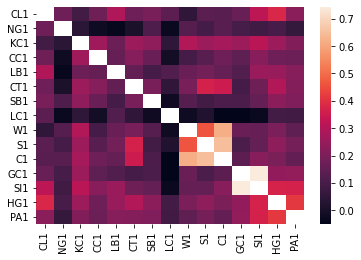

In [6]:
corrmat = retsx.corr()
#ignore self-correlation
corrmat[corrmat==1] = None
sns.heatmap(corrmat)

corr_rank = corrmat.unstack().sort_values().dropna()
pair_min = corr_rank.index[-1]
pair_max = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}:\n{info.loc[pair_min[0]].Name} with {info.loc[pair_min[1]].Name}.\n')
print(f'MAX Correlation pair is {pair_max}:\n{info.loc[pair_max[0]].Name} with {info.loc[pair_max[1]].Name}.')

corrmat

In [7]:
wts_full = tangency_weights(retsx)
wts_diag = tangency_weights(retsx, scale_cov=0)

wts = pd.concat([wts_full,wts_diag],axis=1)
wts.columns = ['Full','Diagonalized']
#wts_full.columns = ['Weights']
wts

,Full,Diagonalized
CL1,0.004802,0.045191
NG1,0.048540,0.030962
KC1,-0.073759,0.029517
CC1,0.074760,0.054128
LB1,0.082285,0.054187
CT1,-0.019497,0.038637
SB1,0.062820,0.050699
LC1,0.110552,0.050982
W1,-0.003395,0.053264
S1,0.058393,0.072998


In [8]:
retsx_tan = retsx @ wts
df = performanceMetrics(retsx_tan,annualization=12)
df.style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max,VaR (0.05),CVaR (0.05)
Full,8.93%,11.68%,76.51%,-14.25%,10.75%,-4.34%,-6.63%
Diagonalized,9.07%,14.43%,62.84%,-16.96%,14.17%,-5.51%,-8.88%


# Now with Hedge Funds

### These funds are highly correlated

In [9]:
hf = pd.read_excel('../practice_midterms/hedge_data.xls', sheet_name = [0,1,2], index_col = 0)
hf = pd.concat(hf.values(), axis=1).loc[:'1998-06',]
hf.drop(columns=['gross','net'],inplace=True)
hf.head()

,Total Index,Convertible Arbitrage,Dedicated Short Bias,Emerging Markets,Equity Market Neutral,Event Driven,Event Driven Distressed,Event Driven Multi-Strategy,Event Driven Risk Arbitrage,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Managed Futures,Multi-Strategy,Market Equity Index
date,,,,,,,,,,,,,,,
1994-04-30,-0.0196,-0.0274,0.0106,-0.0858,0.0003,-0.0088,-0.0093,-0.0079,-0.0118,-0.0042,-0.0181,-0.0178,0.0064,0.0236,0.0068
1994-05-31,0.0198,-0.0127,0.0200,-0.0098,-0.0036,-0.0040,-0.0109,0.0044,0.0000,0.0054,0.0355,0.0032,0.0051,-0.0372,0.0057
1994-06-30,-0.0104,-0.0002,0.0612,0.0024,0.0047,-0.0036,-0.0118,0.0060,-0.0005,-0.0063,-0.0115,-0.0254,0.0392,0.0338,-0.0303
1994-07-31,0.0010,-0.0011,-0.0143,0.0556,-0.0125,0.0029,0.0155,-0.0121,0.0032,-0.0043,-0.0060,0.0104,-0.0126,-0.0248,0.0281
1994-08-31,0.0256,-0.0025,-0.0587,0.1621,-0.0120,0.0061,0.0183,-0.0093,0.0148,-0.0030,0.0254,0.0143,-0.0048,-0.0345,0.0401


In [10]:
performanceMetrics(hf,annualization=12, quantile=.01)

,Mean,Vol,Sharpe,Min,Max,VaR (0.01),CVaR (0.01)
Total Index,0.131929,0.084846,1.554931,-0.0456,0.0654,-0.04310,-0.0456
Convertible Arbitrage,0.054118,0.035637,1.518564,-0.0274,0.0190,-0.02485,-0.0274
Dedicated Short Bias,-0.055647,0.150176,-0.370545,-0.0735,0.1050,-0.07325,-0.0735
Emerging Markets,0.031624,0.185129,0.170819,-0.1026,0.1621,-0.10215,-0.1026
Equity Market Neutral,0.059224,0.037148,1.594258,-0.0159,0.0281,-0.01450,-0.0159
Event Driven,0.094800,0.040418,2.345470,-0.0159,0.0313,-0.01485,-0.0159
Event Driven Distressed,0.121929,0.054472,2.238380,-0.0272,0.0365,-0.02260,-0.0272
Event Driven Multi-Strategy,0.077835,0.046771,1.664185,-0.0249,0.0348,-0.02045,-0.0249
Event Driven Risk Arbitrage,0.056047,0.033577,1.669220,-0.0209,0.0340,-0.01635,-0.0209
Fixed Income Arbitrage,0.043718,0.025507,1.713978,-0.0201,0.0164,-0.01785,-0.0201


In [11]:
maximumDrawdown(hf)

,Max Drawdown,Peak,Bottom,Recover,Peak to Recover
Total Index,-0.045600,1996-06-30,1996-07-31,1996-10-31,123 days
Convertible Arbitrage,-0.080782,1994-04-30,1995-01-31,1995-10-31,549 days
Dedicated Short Bias,-0.361985,1994-06-30,1998-03-31,NaT,NaT
Emerging Markets,-0.300434,1994-09-30,1995-03-31,1997-02-28,882 days
Equity Market Neutral,-0.048262,1994-06-30,1994-11-30,1995-04-30,304 days
Event Driven,-0.034304,1994-09-30,1994-12-31,1995-04-30,212 days
Event Driven Distressed,-0.042319,1994-09-30,1994-12-31,1995-03-31,182 days
Event Driven Multi-Strategy,-0.047036,1994-06-30,1995-03-31,1995-09-30,457 days
Event Driven Risk Arbitrage,-0.031165,1997-01-31,1997-04-30,1997-07-31,181 days
Fixed Income Arbitrage,-0.040189,1997-09-30,1998-06-30,NaT,NaT


,Total Index,Convertible Arbitrage,Dedicated Short Bias,Emerging Markets,Equity Market Neutral,Event Driven,Event Driven Distressed,Event Driven Multi-Strategy,Event Driven Risk Arbitrage,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Managed Futures,Multi-Strategy,Market Equity Index
Total Index,NaN,0.342404,-0.354986,0.542683,0.438529,0.622248,0.499255,0.573334,0.211397,0.316395,0.954262,0.636513,0.460113,-0.120270,0.596618
Convertible Arbitrage,0.342404,NaN,-0.209601,0.360416,0.422206,0.578983,0.444604,0.530718,0.305467,0.397429,0.214680,0.382757,-0.049532,0.119872,0.232923
Dedicated Short Bias,-0.354986,-0.209601,NaN,-0.390374,-0.336968,-0.552132,-0.555829,-0.295746,-0.509530,-0.217757,-0.153744,-0.797890,0.125469,0.128998,-0.797819
Emerging Markets,0.542683,0.360416,-0.390374,NaN,0.167759,0.539653,0.417043,0.491406,0.267395,0.452625,0.370698,0.403272,0.085648,-0.216508,0.363857
Equity Market Neutral,0.438529,0.422206,-0.336968,0.167759,NaN,0.531011,0.483641,0.429649,0.166991,0.194712,0.356050,0.478533,0.402649,0.324851,0.487447
Event Driven,0.622248,0.578983,-0.552132,0.539653,0.531011,NaN,0.866163,0.800249,0.480717,0.427121,0.426595,0.705650,0.202467,0.095352,0.640657
Event Driven Distressed,0.499255,0.444604,-0.555829,0.417043,0.483641,0.866163,NaN,0.408153,0.266874,0.189233,0.308287,0.640128,0.265314,0.018513,0.625691
Event Driven Multi-Strategy,0.573334,0.530718,-0.295746,0.491406,0.429649,0.800249,0.408153,NaN,0.439833,0.578586,0.456065,0.494349,0.075795,0.150031,0.400459
Event Driven Risk Arbitrage,0.211397,0.305467,-0.509530,0.267395,0.166991,0.480717,0.266874,0.439833,NaN,0.235003,0.052210,0.531241,-0.044249,0.037236,0.432585
Fixed Income Arbitrage,0.316395,0.397429,-0.217757,0.452625,0.194712,0.427121,0.189233,0.578586,0.235003,NaN,0.211461,0.267146,-0.086216,-0.056080,0.243747


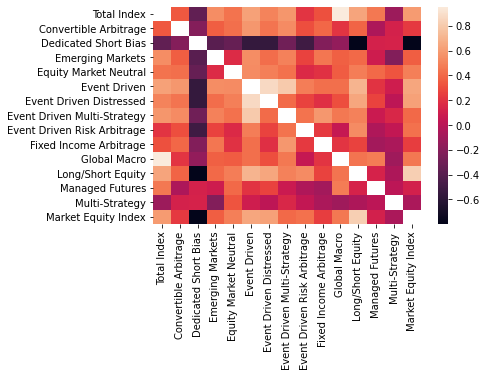

In [12]:
corrmat = hf.corr()
#ignore self-correlation
corrmat[corrmat==1] = None
sns.heatmap(corrmat)

corr_rank = corrmat.unstack().sort_values().dropna()
pair_min = corr_rank.index[-1]
pair_max = corr_rank.index[0]

#print(f'MIN Correlation pair is {pair_min}:\n{info.loc[pair_min[0]].Name} with {info.loc[pair_min[1]].Name}.\n')
#print(f'MAX Correlation pair is {pair_max}:\n{info.loc[pair_max[0]].Name} with {info.loc[pair_max[1]].Name}.')

corrmat

In [13]:
wts_full = tangency_weights(hf)
wts_diag = tangency_weights(hf, scale_cov=0)

wts = pd.concat([wts_full,wts_diag],axis=1)
wts.columns = ['Full','Diagonalized']
#wts_full.columns = ['Weights']
wts

,Full,Diagonalized
Total Index,-0.560125,0.043852
Convertible Arbitrage,-0.098120,0.101961
Dedicated Short Bias,0.110623,-0.005904
Emerging Markets,0.002733,0.002208
Equity Market Neutral,0.125369,0.102690
Event Driven,-0.882766,0.138854
Event Driven Distressed,0.793029,0.098325
Event Driven Multi-Strategy,0.241542,0.085140
Event Driven Risk Arbitrage,0.479861,0.118954
Fixed Income Arbitrage,0.373310,0.160790


In [14]:
hf_tan = hf @ wts
hf = performanceMetrics(hf_tan,annualization=12)
hf.style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max,VaR (0.05),CVaR (0.05)
Full,8.39%,1.86%,449.80%,-0.41%,1.78%,-0.19%,-0.33%
Diagonalized,8.26%,3.31%,249.56%,-0.86%,2.82%,-0.70%,-0.81%
